In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Capstone Project- Medical Insurance Price Prediction

/content/drive/MyDrive/Capstone Project- Medical Insurance Price Prediction


In [ ]:
!ls

 DataForML.pkl		      medical_insurance_price_prediction.ipynb
 Final_XGB_Model.pkl	     'UCC_student_u3265313&u3246575'
 insurance_data_cleaned.csv  'UCC_student_u3265313&u3246575StudentID.gdoc'
 Medical_insurance.csv


This Project is based on Medical Insurance Price Prediction available from kaggle repository.

(https://www.kaggle.com/code/dylandsi/medical-insurance-price-prediction)


1. It contains the details (e,g, age, sex, bmi etc.)of 2773 customers.

2. My project task is to create a machine learning model which can predict the price of insurance on its characteristics.

3. For solving this problem, I will approach the task, with a step by step approach to create a data analysis and prediction model based on
(machine learning/AI algorithms, regression algorith for example) available from different Python packages, modules and classes









#**Step.1 : Reading the Dataset with Python**





In [ ]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

 #**Data Loading and Inspection:**

1. Load the dataset into a pandas DataFrame.
2. Inspect the first few rows of the dataset to understand its structure and the type of data it contains.
3. Check for missing values and handle them appropriately, either by imputing missing values or removing rows/columns with missing data if necessary.
Check for any inconsistencies or anomalies in the data that may need to be addressed.








In [ ]:
# Reading the dataset
import pandas as pd
import numpy as np
insurance_data=pd.read_csv('/content/drive/MyDrive/Capstone Project- Medical Insurance Price Prediction/Medical_insurance.csv', encoding='latin')
print('Shape before deleting duplicate values:', insurance_data.shape)

# Removing duplicate rows if any
insurance_data=insurance_data.drop_duplicates()
print('Shape After deleting duplicate values:', insurance_data.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
insurance_data.head(10)

Shape before deleting duplicate values: (2302, 7)
Shape After deleting duplicate values: (1112, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,25,male,26.220,0,no,northeast,2721.32080


## Key observations from Step 1 about Data Description


*   This file contains 2773 insurance customer details from the medical insureance dataset .
* Here total attributes number is 7.
* The attributes are:
     **age, sex, bmi, children, amoker, region, charges.**
* Here, bmi is body mass index.
* Shape before deleting duplicate values: (2302, 7)
* Shape After deleting duplicate values: (1112, 7)




#**Step.2 :Problem Statement Definition**

Develop a machine learning model to predict medical expenses for individuals based on various factors such as age, gender, BMI, number of children, smoking status, and region. The model should provide accurate estimates of medical charges for new customers, enabling the insurance company to make informed decisions regarding pricing and risk assessment.

#**Step.3 : Target Variable Identification**

In [ ]:
import pandas as pd

# Load the medical insurance dataset
insurance_data = pd.read_csv('/content/drive/MyDrive/Capstone Project- Medical Insurance Price Prediction/Medical_insurance.csv')

# Check column names
print(insurance_data.columns)

# Inspect the dataset
print(insurance_data.head())

# Extract the target variable if the column name is correct
if 'charges' in insurance_data.columns:
    target_variable = insurance_data['charges']
    print(target_variable)
else:
    print("Column 'charges' not found in the dataset.")

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2297     8569.86180
2298     2020.17700
2299    16450.89470
2300    21595.38229
2301     9850.43200
Name: charges, Length: 2302, dtype: float64


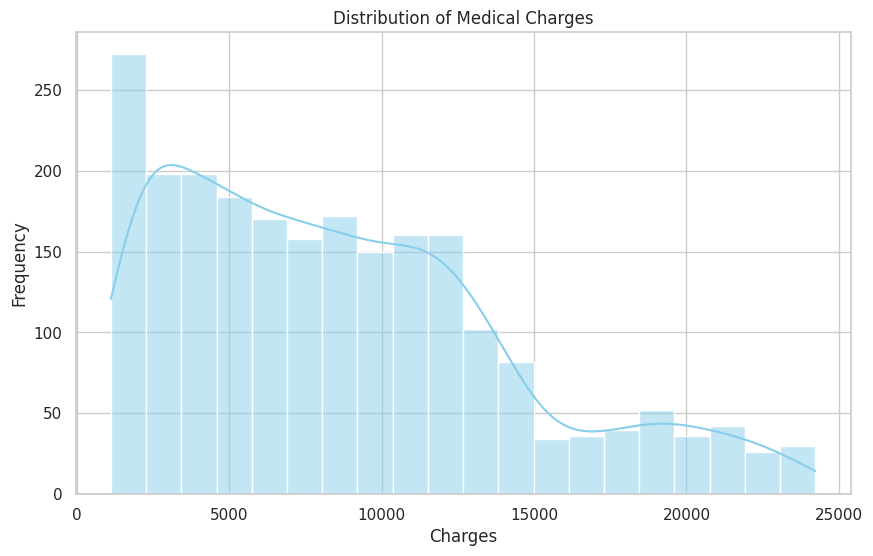

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Plot the distribution of charges
sns.histplot(insurance_data['charges'], kde=True, color='skyblue')

# Add labels and title
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')

# Show the plot
plt.show()

#**Step 4: Choosing the appropriate ML/AI Algorithm for Data Analysis.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
insurance_data = pd.read_csv('/content/drive/MyDrive/Medical_insurance.csv')

# Perform one-hot encoding for categorical variables
insurance_data_encoded = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'])

# Prepare the data
X = insurance_data_encoded.drop(columns=['charges'])
y = insurance_data_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regression model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 1269.770368409009
Mean Squared Error: 7377638.279722549
R-squared: 0.9519312466154424


#**Step.5 :Looking at the class distribution (Target variable distribution to check if the data is balanced or skewed.**
* If target variable's distribution is too skewed then the predictive modeling will lead to poor results.
* Ideally Bell curve is desirable but slightly positive skew or negative skew is also fine.
* When performing Regression algorithm modelling and analysis, we need to make sure the histogram looks like a bell curve or slight skewed version of it.
* Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios from the data.

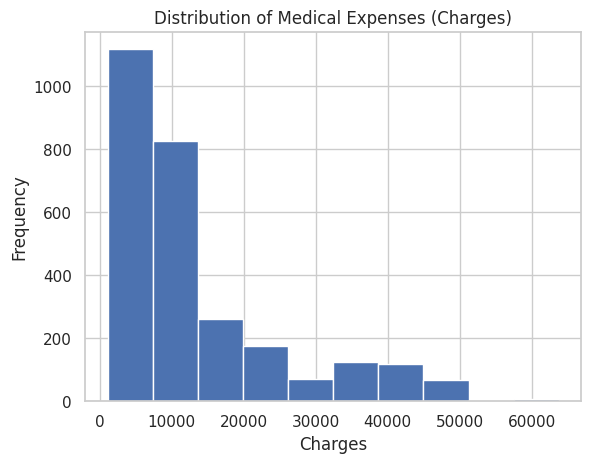

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have loaded the medical insurance dataset into a variable named 'insurance_data'
# Replace 'insurance_data' with the appropriate variable name if it's different
insurance_data['charges'].hist()

plt.title('Distribution of Medical Expenses (Charges)')
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.show()



<Axes: >

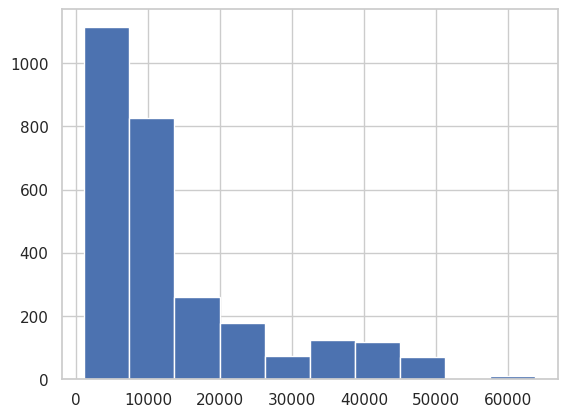

In [ ]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the MEDV values
insurance_data['charges'].hist()

#**Step.6 :Visualising the distribution of Target variable**



This code will create a histogram showing the distribution of medical expenses (charges) among the individuals in the dataset. Adjust the number of bins and colors as needed to improve the visualization.

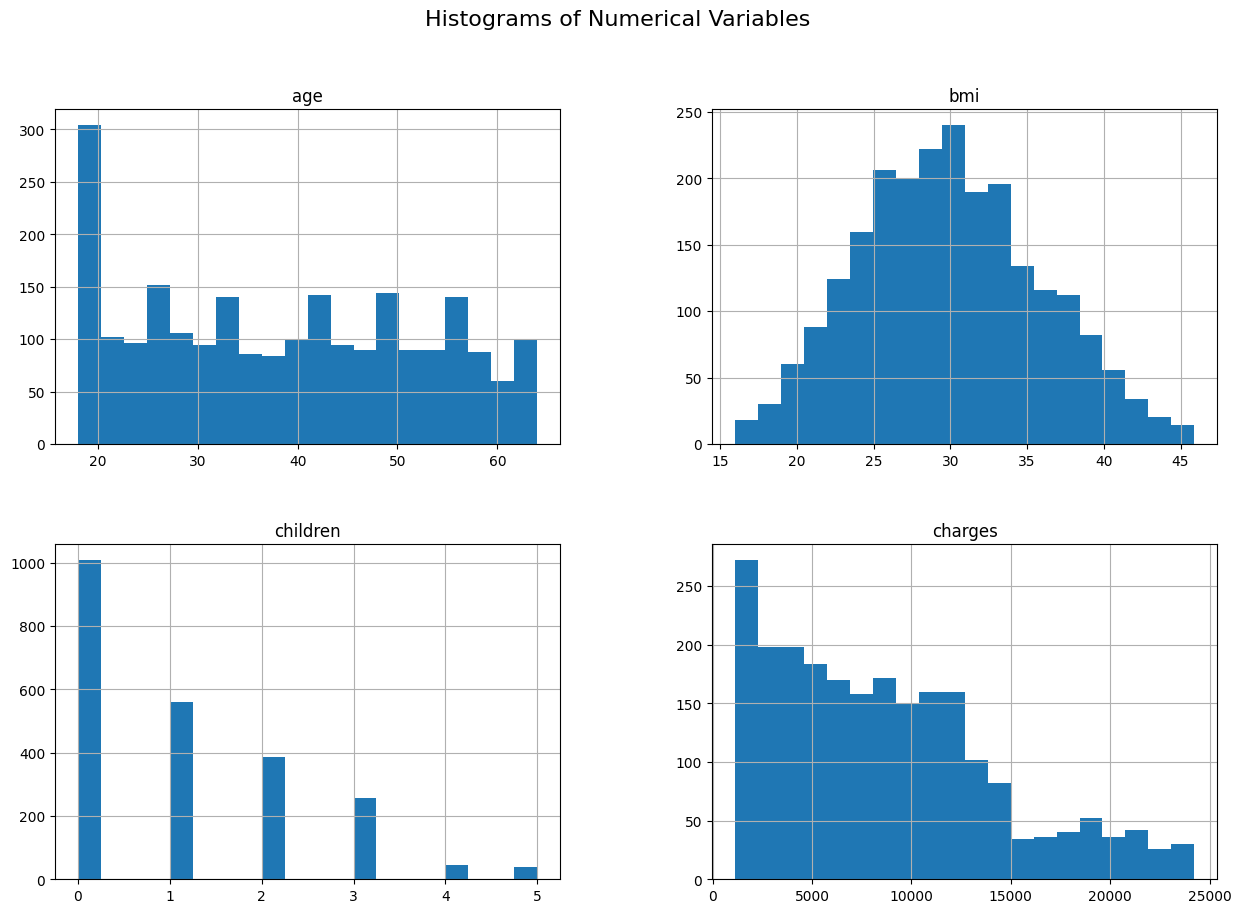

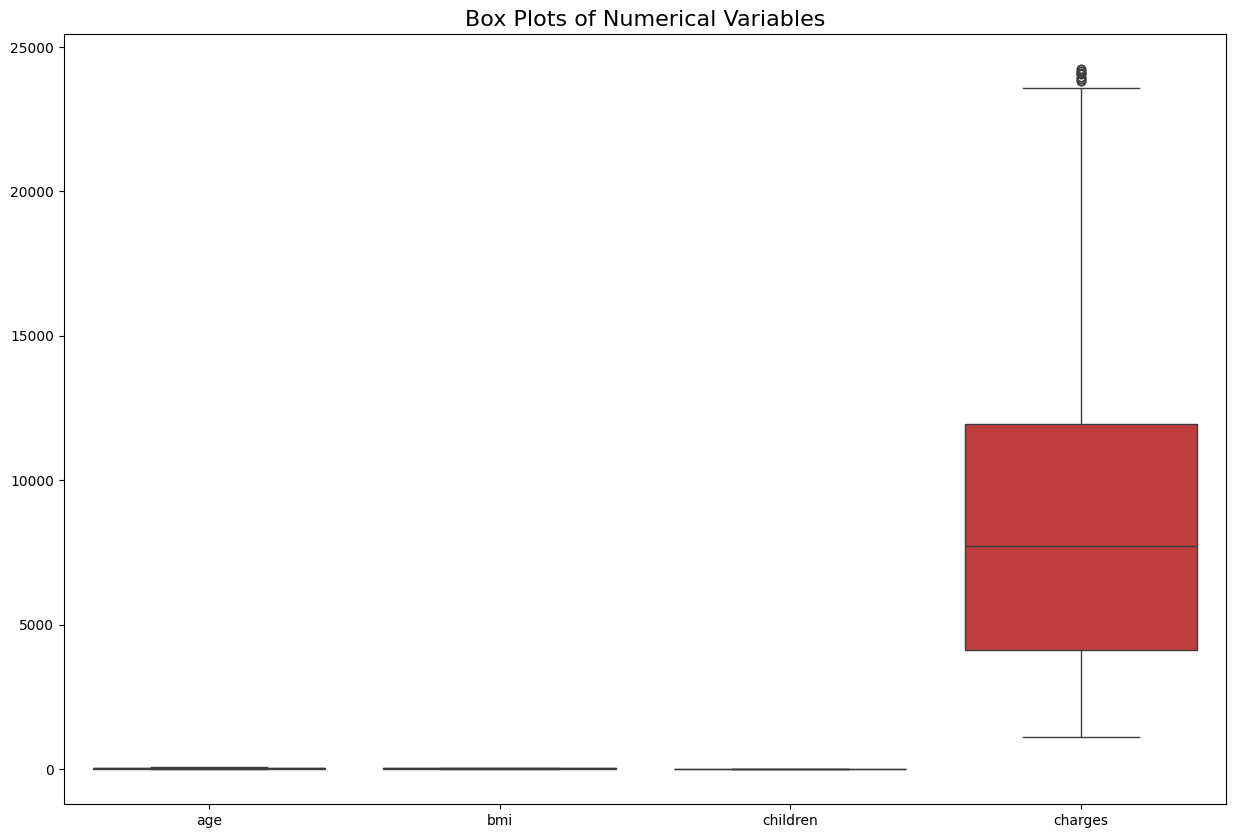

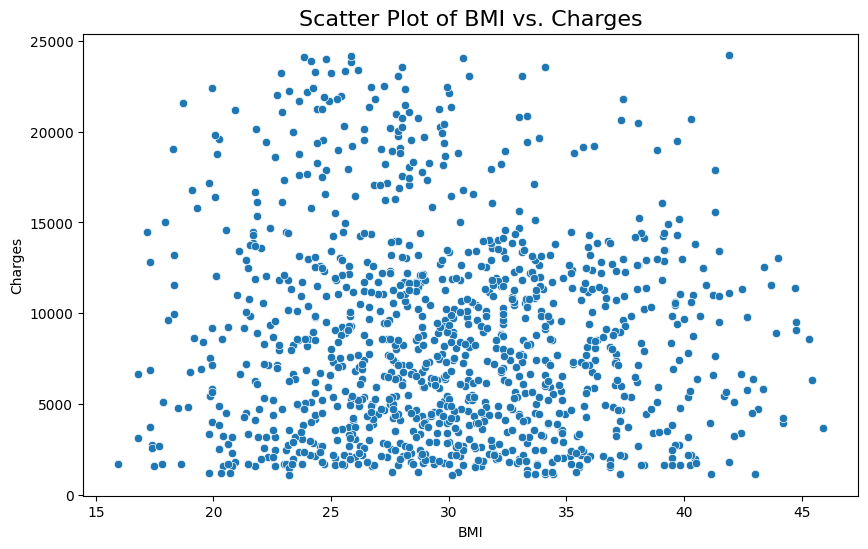

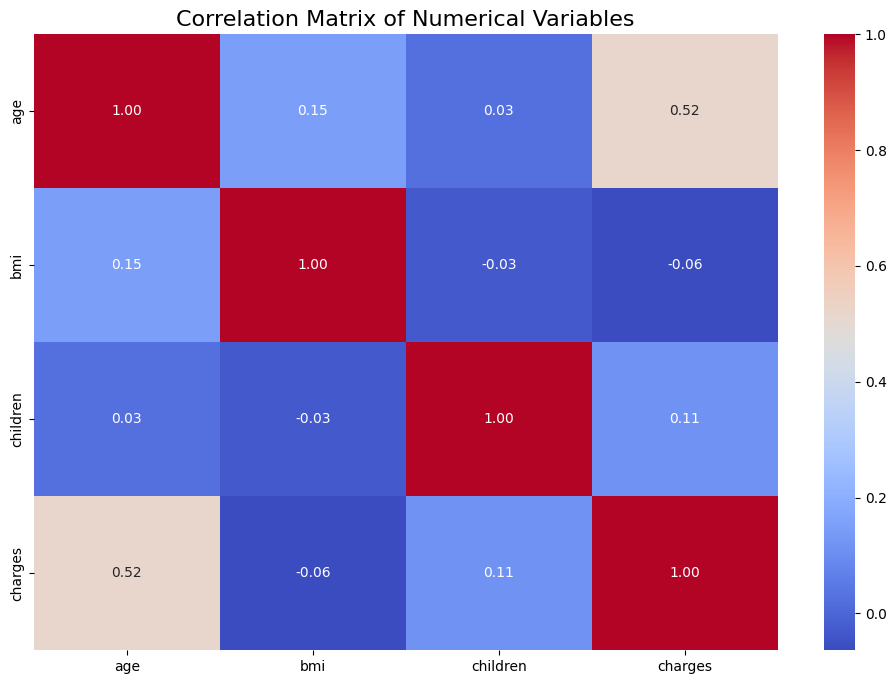

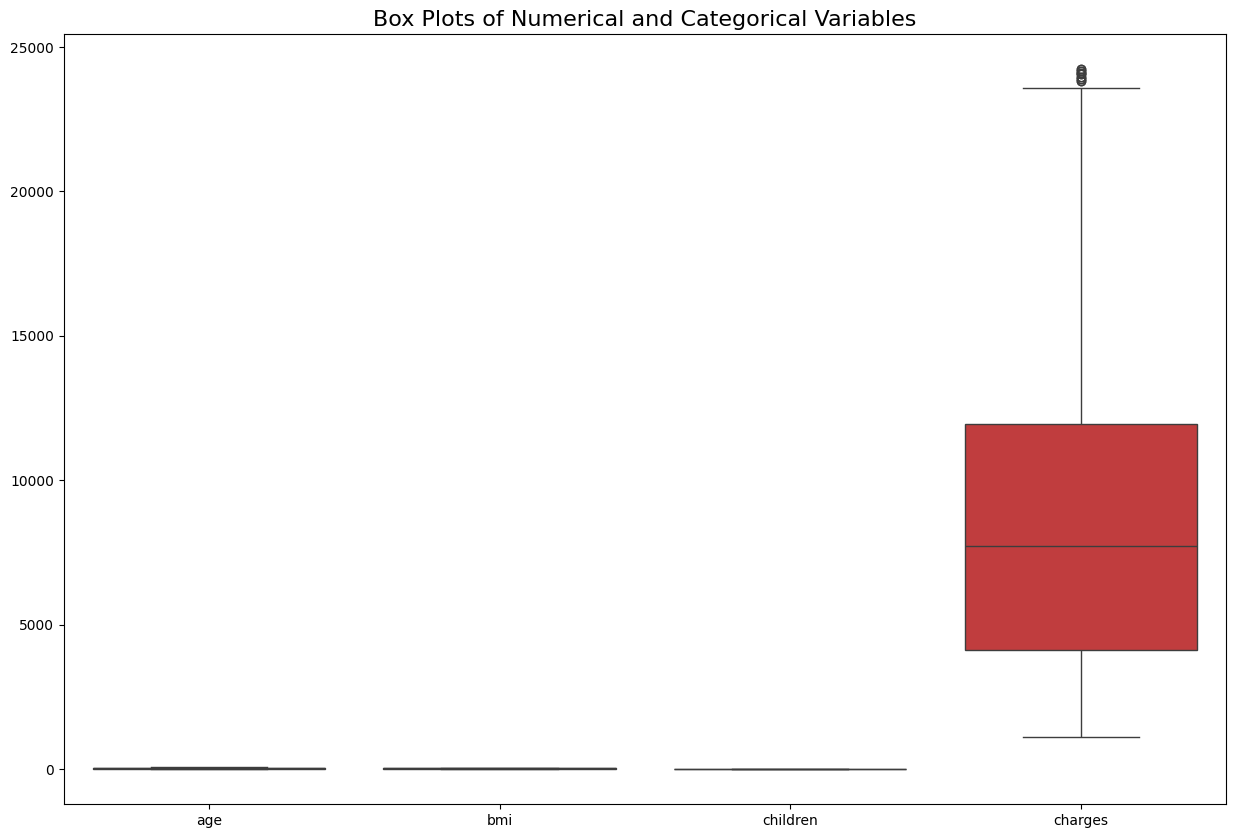

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the medical insurance dataset
insurance_data = pd.read_csv('/content/drive/MyDrive/Capstone Project- Medical Insurance Price Prediction/Medical_insurance.csv')

# Define numerical and categorical columns
numerical_columns = ['age', 'bmi', 'children', 'charges']
categorical_columns = ['sex', 'smoker', 'region']

# Explore the distributions of variables through visualizations
# Histograms for numerical variables
insurance_data[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.show()

# Box plots for numerical variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=insurance_data[numerical_columns])
plt.title('Box Plots of Numerical Variables', fontsize=16)
plt.show()

# Scatter plot for BMI vs. Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=insurance_data)
plt.title('Scatter Plot of BMI vs. Charges', fontsize=16)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# Investigate correlations between numerical variables
correlation_matrix = insurance_data[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.show()

# Box plots for numerical and categorical variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=insurance_data[numerical_columns + categorical_columns])
plt.title('Box Plots of Numerical and Categorical Variables', fontsize=16)
plt.show()


## Observations from previous step
* The data distribution of the target variable is satisfactory to proceed further.
* There are sufficient number of rows for each type of values to learn from.

## **Step.7: Basic Exploratory Data Analysis**
* This step is performed to guage the overall data.
* The volume of data, the types of columns present in the data.
* Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

* This step helps to start the column/data rejection process.
* You must look at each column carefully and ask, does this column affect the values of the Target variable/Class?
* For example in this dataset, you will ask, does this column affect the price of the house?
* If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

* There are four commands which are used for Basic data exploratory Analysis in Python

* head() : This helps to see a few sample rows of the data
* info() : This provides the summarized information of the data
* describe() : This provides the descriptive statistical details of the data
* nunique(): This helps us to identify if a column is categorical or continuous


In [ ]:
# Looking at sample rows in the data
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Looking at sample rows in the data
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
2297,47,female,45.320,1,no,southeast,8569.86180
2298,21,female,34.600,0,no,southwest,2020.17700
2299,19,male,26.030,1,yes,northwest,16450.89470
2300,23,male,18.715,0,no,northwest,21595.38229
2301,54,male,31.600,0,no,southwest,9850.43200


In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2302 non-null   int64  
 1   sex       2302 non-null   object 
 2   bmi       2302 non-null   float64
 3   children  2302 non-null   int64  
 4   smoker    2302 non-null   object 
 5   region    2302 non-null   object 
 6   charges   2302 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 126.0+ KB


In [ ]:
# Looking at the descriptive statistics of the data
insurance_data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,2302.000000,2302,2302.000000,2302.000000,2302,2302,2302.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,female,NaN,NaN,no,southwest,NaN
freq,NaN,1178,NaN,NaN,2102,592,NaN
mean,38.425717,NaN,29.974513,1.084275,NaN,NaN,8670.574830
std,13.911042,NaN,5.868722,1.227253,NaN,NaN,5565.408043
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,25.740000,0.000000,NaN,NaN,4134.942512
50%,38.000000,NaN,29.700000,1.000000,NaN,NaN,7731.427100
75%,50.000000,NaN,33.906250,2.000000,NaN,NaN,11944.998112


In [ ]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
insurance_data.nunique()

age           47
sex            2
bmi          499
children       6
smoker         2
region         4
charges     1112
dtype: int64

## **Observations from Step.7 - Basic Exploratory Data Analysis**
* Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column.
* Hence, creating a initial roadmap for further analysis.

* The selected columns in this step are not final, further study will be done and then a final list will be created


* age - Continuous. Selected.
* sex - Categorical. Selected.
* bmi - Continuous. Selected.
* children - Categorical. Selected.
* smoker - Categorical. Selected.
* region - Categorical. Selected.
* charges - Continuous. Selected.
 This is the Target or Class Variable, which needs to be predicted by the proposed regression model!

#**Step.8 :Identifying and Rejecting useless columns**

1. There are no qualitative columns in the data.
2. Hence no need to remove any column.

#**Step.9 :Visual Exploratory Data Analysis of data (with Histogramand Barcharts)**

* Visualize distribution of all the Categorical Predictor variables in the data using bar plots
* We can spot a categorical variable in the data by looking at the unique values in them.
* Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.
* Based on the Basic Exploration Data Analysis in the previous step,  we could spotted two categorical predictors in the data

* Categorical Predictors:

* 'sex'
* 'children'
* 'smoker'
* 'region'

* We will use bar charts to see how the data is distributed for these categorical columns.

In [ ]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

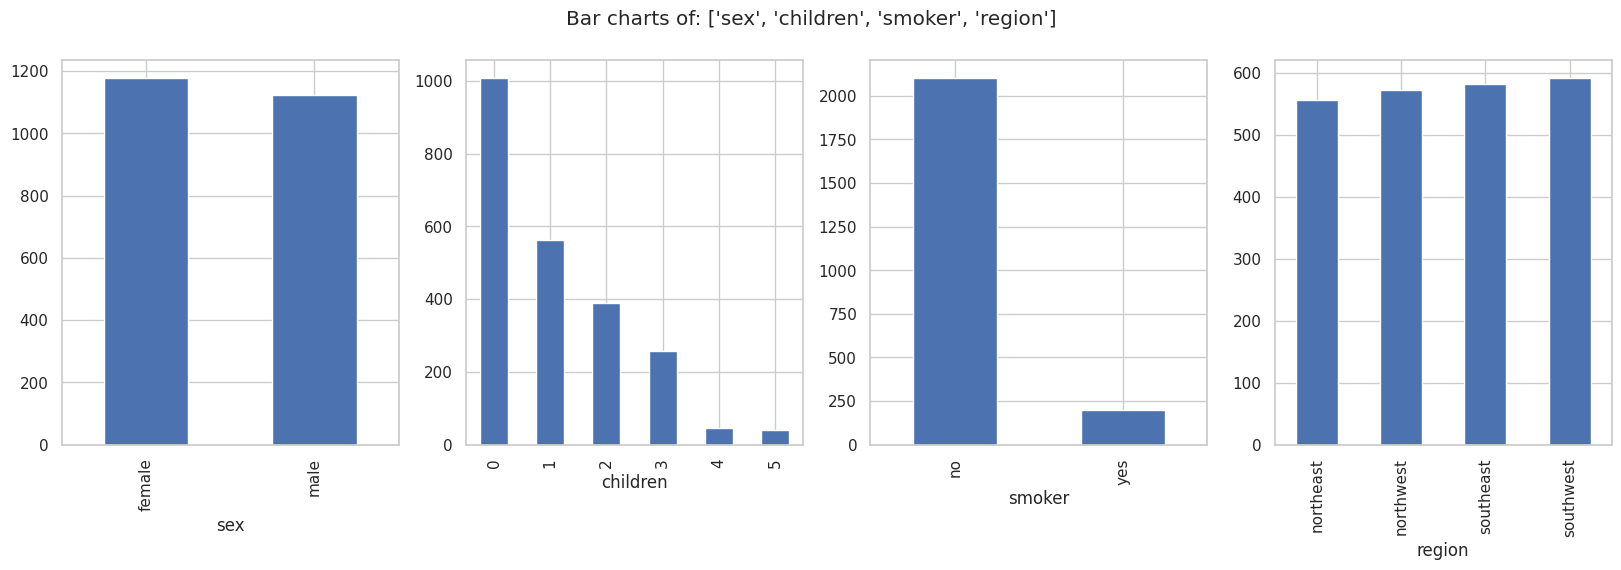

In [ ]:
#####################################################################
# Calling the function PlotBarCharts() we have created
PlotBarCharts(inpData=insurance_data, colsToPlot=['sex','children','smoker','region'])

##Observation from Step 9 - Visual Exploratory Data Analysis
* Bar charts have made it possible to analyse the two data columns.
* The category names are displayed on the X-axis of the bar charts,
while the frequencies of each category are displayed on the Y-axis.
* Every category in the perfect bar chart has a comparable frequency.
* since of this, the ML/AI regression algorithm can learn since there
are enough rows in the data for each category.
* If there's a column in a chart that's heavily skewed, it means one
bar stands out a lot while the others have very few instances.
* The construction of machine learning models could not benefit
greatly from these kinds of columns.
* As the correlation analysis stage approaches, we may validate this
and make a final decision on whether to accept or reject the
column/data attribute.
* It's important to note that "sex" and "smoker" in this dataset is biassed.
* There is just one bar that is in control, and the other has
relatively few rows.
* Because there is nothing to learn from such columns, it is possible
that they are not associated with the target variable.
* The algorithms cannot find any rule like when the value is this then
the target variable is that.
*  certain categorical
variables Two of the category variables have been chosen for
additional examination.
 **'sex', 'children','smoker','region'**

#**Step.10 :Now Visualize distribution of all the Continuous Predictor variables in the data using histograms**

* Based on the Basic Exploratory Data Analysis, there are eleven continuous predictor variables 'age', 'bmi', 'charges'

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'charges'}>, <Axes: >]], dtype=object)

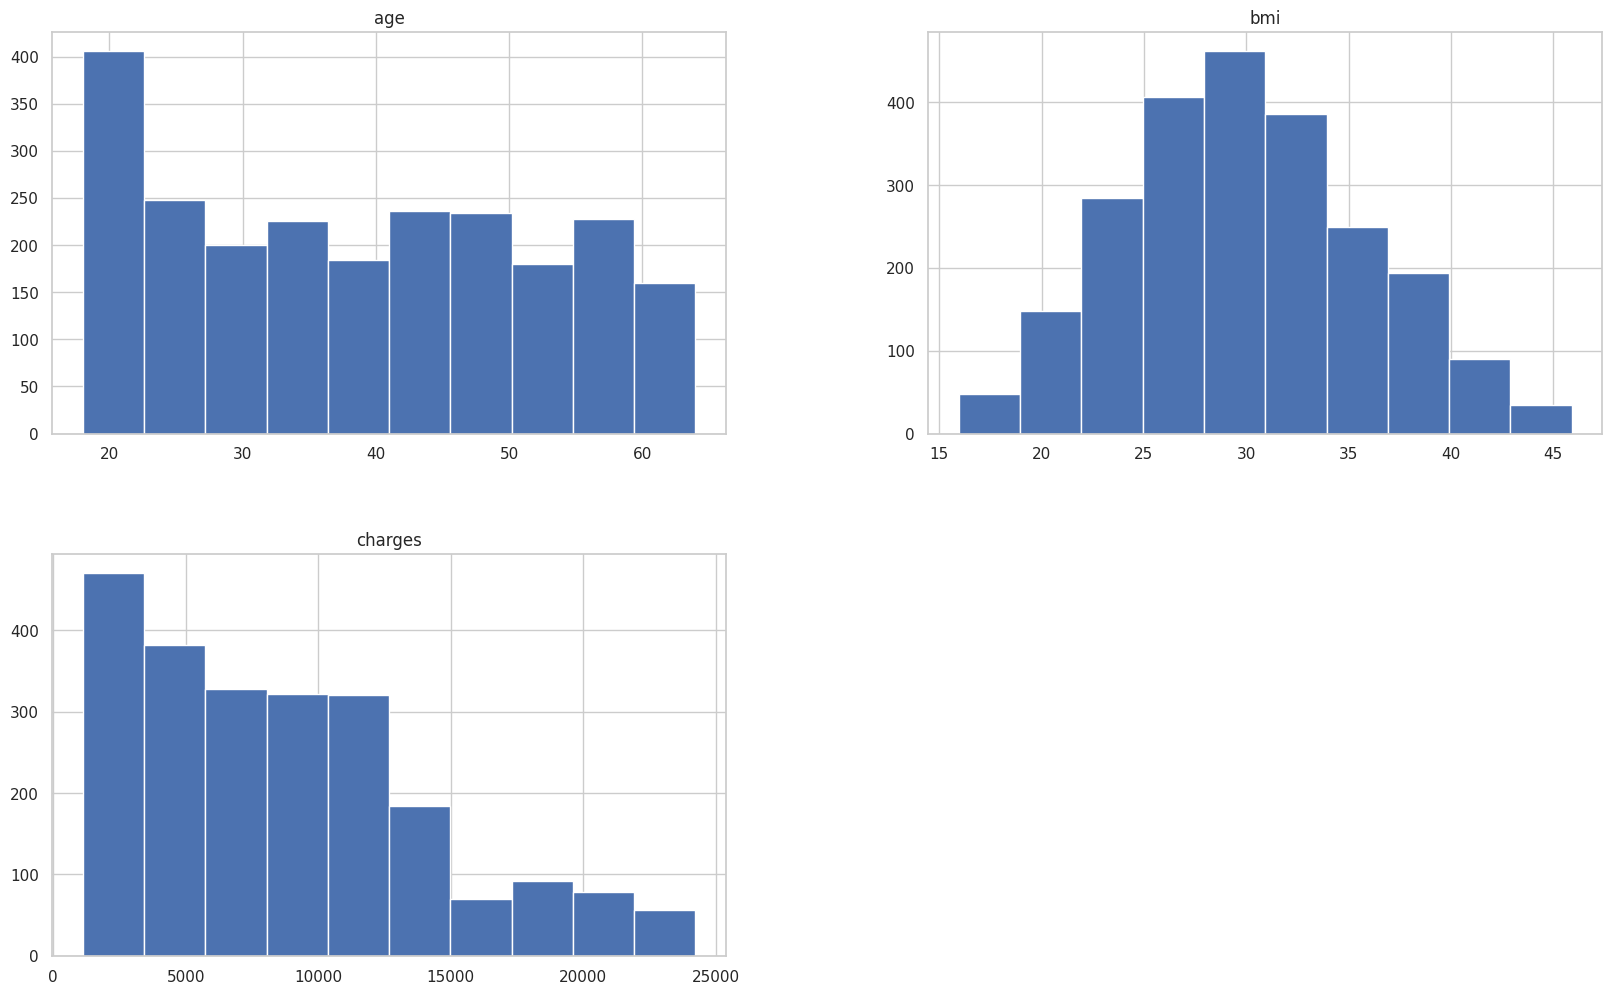

In [ ]:
# Plotting histograms of multiple columns together
insurance_data.hist(['age', 'bmi', 'charges'], figsize=(20,12))

## Observations from Step 10
* Histogram Interpretation
* Each histograms shows us the data distribution for a single continuous variable.

* The X-axis shows the range of values and Y-axis represent the number of values in that range.
* For example, in the above histogram of "AGE", there are around 450 rows in data that has age value between 0 to 60.

* The Age histogram does not show a bell curve; it has a fairly uniform distribution across age ranges until it drops off after 60.
* The BMI histogram is somewhat bell-shaped but is right-skewed, showing a concentration in the mid to high range.
* The Charges histogram is highly right-skewed, typical for financial data where many observations cluster at lower values with fewer at high values.

* Selected Continuous Variables:
*age
*bmi
*charges

#**Step.11 :Feature Selection based on data distribution**

Feature Importance Scores:
             Feature  Score
0                age    inf
1                bmi    inf
2           children    inf
3         sex_female    inf
4           sex_male    inf
5          smoker_no    inf
6         smoker_yes    inf
7   region_northeast    inf
8   region_northwest    inf
9   region_southeast    inf
10  region_southwest    inf


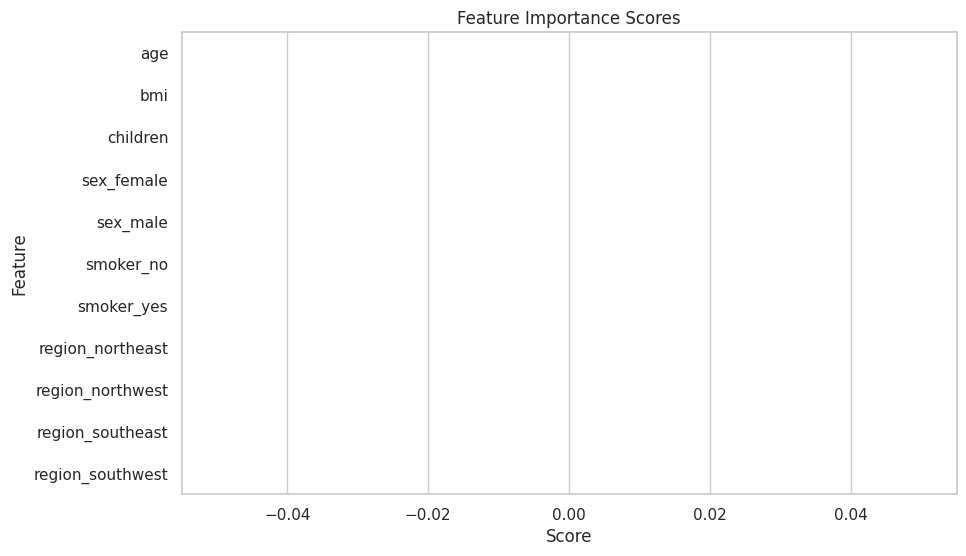

Selected Features: ['age', 'bmi', 'children', 'sex_female', 'sex_male']


RandomForestRegressor()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
insurance_data = pd.read_csv('Medical_insurance.csv')

# Perform one-hot encoding for categorical variables
categorical_columns = ['sex', 'smoker', 'region']  # Ensure column names are lowercase
insurance_data_encoded = pd.get_dummies(insurance_data, columns=categorical_columns)

# Define features and target variable
X = insurance_data_encoded.drop(columns=['charges'])  # Features
y = insurance_data_encoded['charges']  # Target variable

# Use statistical tests to determine feature importance
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print("Feature Importance Scores:")
print(feature_scores)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores, palette='viridis')
plt.title('Feature Importance Scores')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

# Select top k features based on importance scores
k = 5  # Example: Select top 5 features
selected_features = feature_scores['Feature'].head(k).tolist()
print("Selected Features:", selected_features)

# Train a machine learning model using selected features
X_selected = X[selected_features]
model = RandomForestRegressor()
model.fit(X_selected, y)


## **Step 12: Outlier Analysis**
* Outliers are extreme values in the data which are far away from most of the values.
* You can see them as the tails in the histogram.

* Outlier must be treated one column/data attribute at a time.
* As the treatment will be slightly different for each column
* Why I should analyse the outliers?
* Outliers bias the building of machine learning models.
* As the algorithm tries to fit the extreme value, it goes away from majority of the data.
* Outlined below are two options to treat outliers in the data.

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value
* Let us find out out the most logical value to be replaced in place of outliers by looking at the histogram.


In [ ]:
#Replacing outliers for 'charges'
# Finding nearest values to 6500 mark
insurance_data[insurance_data['charges']<6500].sort_values(by='charges',ascending=False)

,age,sex,bmi,children,smoker,region,charges
2129,40,female,27.40,1,no,southwest,6496.8860
978,40,female,27.40,1,no,southwest,6496.8860
2197,42,female,37.90,0,no,southwest,6474.0130
1046,42,female,37.90,0,no,southwest,6474.0130
974,38,male,29.26,2,no,northwest,6457.8434
...,...,...,...,...,...,...,...
672,18,male,30.14,0,no,southeast,1131.5066
782,18,male,23.21,0,no,southeast,1121.8739
1933,18,male,23.21,0,no,southeast,1121.8739
1141,18,male,23.21,0,no,southeast,1121.8739


Observation: Above result shows the nearest logical value is 6496.8860, hence, replacing any value above 6500 with it.

In [ ]:
# Replacing outliers with nearest possibe value
insurance_data['charges'][insurance_data['charges']>6500] =6496.8860

#**Step.13 : Removal of outliers and missing values**

array([[<Axes: title={'center': 'charges'}>]], dtype=object)

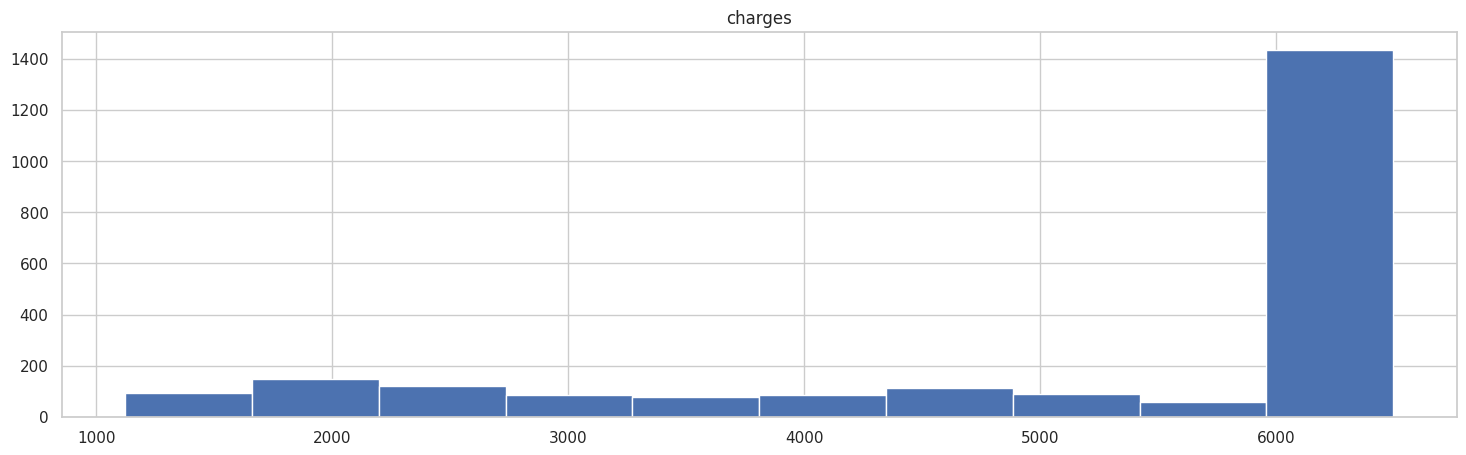

In [ ]:
insurance_data.hist(['charges'], figsize=(18,5))

## Observation from Step 13
* The distribution has improved after the outlier treatment.
* There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

## **Step 14: Missing Values Analysis**

* Missing values are treated for each column separately.
* If a column has more than 30% data missing, then missing value treatment cannot be done.
* That column must be rejected because too much information is missing.
* Outlined below are some options for treating missing values in data.
* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [ ]:
# Finding how many missing values are there for each column
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##Observations from Step 14: Missing Value Analysis
* No missing values in this data!
* So no removal of any data samples(rows) is needed.

# **Step 15: Feature Selection (Attribute Selection)**

* Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
* This can be done directly by measuring the correlation values or ANOVA analysis or Chi-Square tests.
* However, it is always helpful to visualize the relation between the Target variable/class variable and each of the predictors(features) to get a better sense of data.

* Listed below are some of the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

* **Visual exploration of relationship between variables**
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots
* Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

* **For this dataset, the Target variable is Continuous, hence following two scenarios will need attention**

* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor


## Relationship exploration: Continuous Vs Continuous -- Scatter Charts
* When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using a metric called pearson's correlation value.

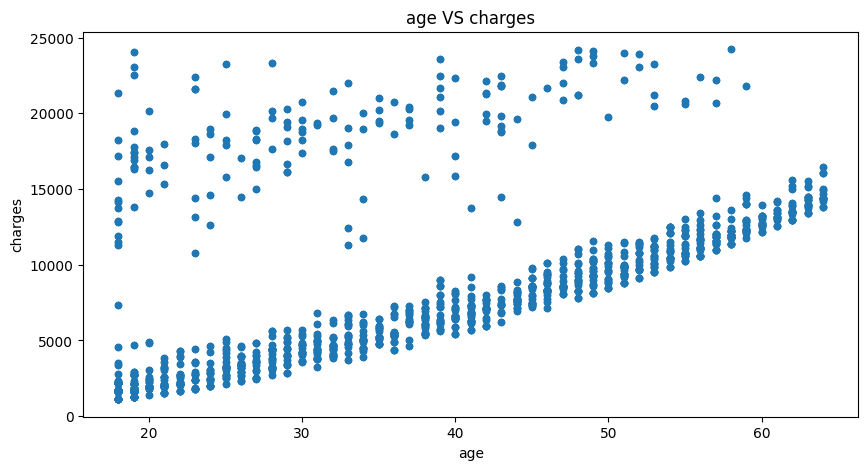

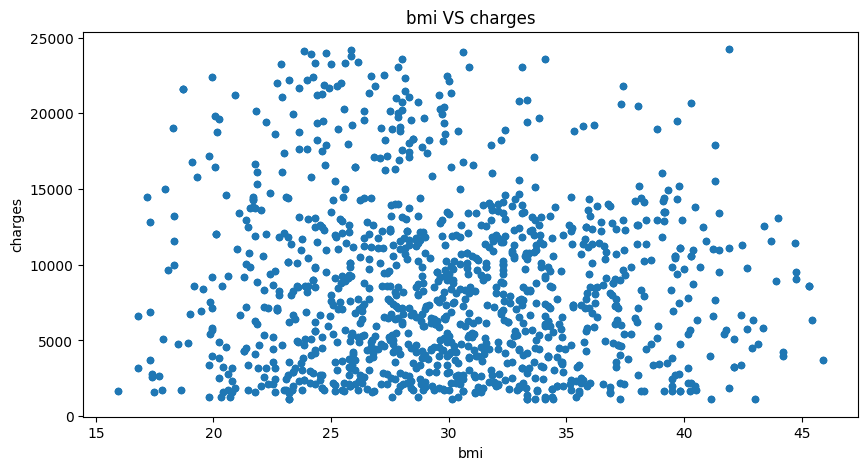

In [ ]:
ContinuousCols=['age','bmi']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
   insurance_data.plot.scatter(x=predictor, y='charges', figsize=(10,5), title=predictor+" VS "+ 'charges')

## Scatter charts interpretation
* Scatter charts are great visual tools for understanding the relationship between two variables.

* **Increasing Trend**: If you observe points clustering in a manner that suggests an upward slope from left to right, it indicates a positive correlation. This suggests that as one variable increases, the other tends to increase as well. It's valuable for machine learning because it indicates a potential predictive relationship.

* **Decreasing Trend**: Conversely, if the points form a downward slope from left to right, it suggests a negative correlation. Here, as one variable increases, the other tends to decrease. Like an increasing trend, this is also beneficial for machine learning model building.
No Trend: If there's no clear pattern or trend visible, it suggests little to no correlation between the variables. In this case, using this predictor as a feature in machine learning might not be very effective.


* Based on this chart we can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value in the next step.


## **Step 16: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value**

* Pearson's correlation coefficient is a powerful metric for doing this.
* It can simply be calculated as the covariance between two features  x and  y
  (numerator) divided by the product of their standard deviations (denominator):

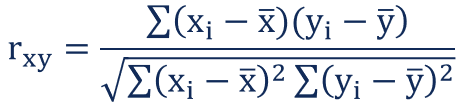

* This value can be calculated only between two numeric columns
Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question.



In [ ]:
# Calculating correlation matrix
ContinuousCols=['age', 'charges', 'bmi',]

# Creating the correlation matrix
CorrelationData=insurance_data[ContinuousCols].corr()
CorrelationData

,age,charges,bmi
age,1.000000,0.515760,0.149521
charges,0.515760,1.000000,-0.063601
bmi,0.149521,-0.063601,1.000000


In [ ]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['charges'][abs(CorrelationData['charges']) > 0.5 ]

age        0.739907
charges    1.000000
Name: charges, dtype: float64

## Observations from Step 16
* Final selected Continuous columns:

* **'age'**

# **Step 17:  Relationship exploration: Categorical Vs Continuous -- Box Plots**
* When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots,  and
* Measure the strength of relation using Anova test.

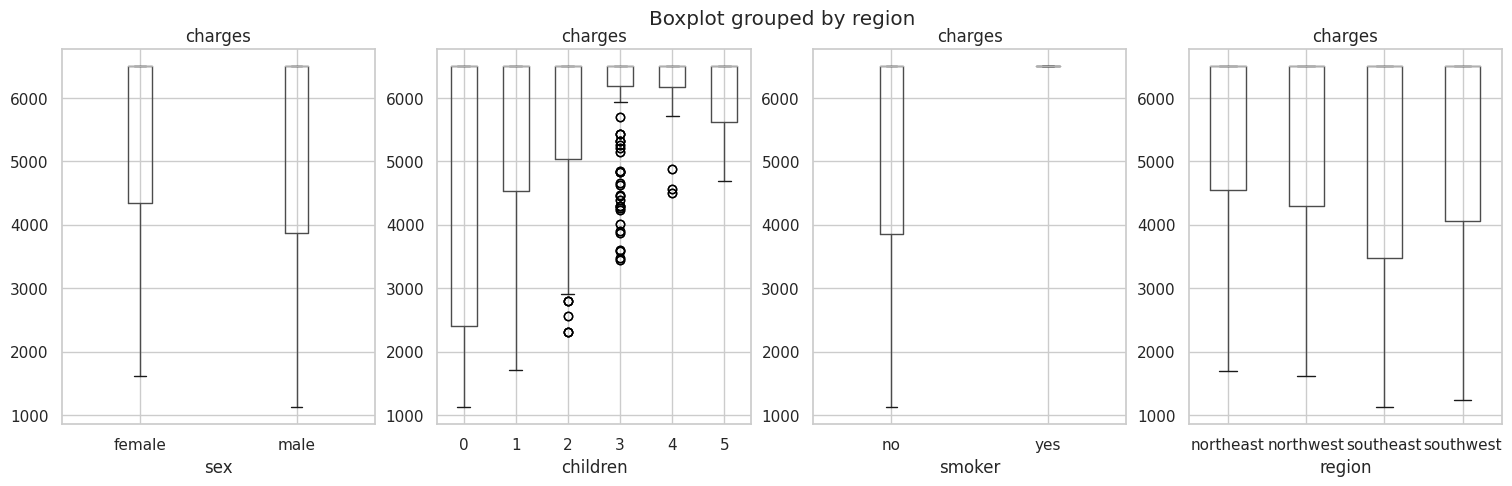

In [ ]:
# Box plots for continuous Target Variable "charges" and Categorical predictors
CategoricalColsList=['sex', 'children', 'smoker', 'region']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "MEDV"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    insurance_data.boxplot(column='charges', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

##Observations from Step 17: Box-Plots interpretation


* These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

* If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

* On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with MEDV.

* For this datadata, both the categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below

## **Step 18: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test**

* Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0) Null Hypothesis: There is NO relation between the given variables (i.e.
* The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 (Null Hypothesis being true

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [ ]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['sex', 'children', 'smoker', 'region']
FunctionAnova(inpData=insurance_data,
              TargetVariable='charges',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

sex is NOT correlated with charges | P-Value: 0.12753368412626134
children is correlated with charges | P-Value: 3.0118185046581406e-07
smoker is correlated with charges | P-Value: 2.474527727919898e-205
region is correlated with charges | P-Value: 0.000734846336935172


['children', 'smoker', 'region']

##Observations from Step 18
* The results of ANOVA confirm our visual analysis using box plots above.

* All categorical variables are correlated with the Target variable except 'sex'.
* This is something we can guess by looking at the box plots!

* Final selected Categorical columns:

 **'children', 'smoker', 'region'**


## Selecting final Predictors/Features for building Machine Learning/AI model.
* Based on the extensive tests with exploratory data analysis, we can select the final features/predictors/columns for machine learning model building as:
* **'age', 'children', 'smoker', 'region'**


In [ ]:
SelectedColumns=['age', 'children', 'smoker', 'region']

# Selecting final columns
DataForML=insurance_data[SelectedColumns]
DataForML.head()

,age,children,smoker,region
0,19,0,yes,southwest
1,18,1,no,southeast
2,28,3,no,southeast
3,33,0,no,northwest
4,32,0,no,northwest


from matplotlib import pyplot as plt
_df_12['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['children'].plot(kind='hist', bins=20, title='children')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_14.groupby('smoker').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_15.groupby('region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='age', y='children', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['children'].plot(kind='line', figsize=(8, 4), title='children')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['region'].value_counts()
    for x_label, grp in _df_19.groupby('smoker')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('smoker')
_ = plt.ylabel('region')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['smoker'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='age', y='smoker', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='age', y='region', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['smoker'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='children', y='smoker', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='children', y='region', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## **Step 19: Data Pre-processing for Machine Learning Model Building or Model Development**
* List of steps that needs to be performed on predictor variables before data can be used for machine learning

* Converting each Ordinal Categorical columns to numeric
* Converting Binary nominal Categorical columns to numeric using 1/0 mapping
* Converting all other nominal categorical columns to numeric using pd.get_dummies()
* Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks
* Converting the ordinal variable to numeric - In this data there is no Ordinal categorical variable.
* Converting the binary nominal variable to numeric using 1/0 mapping: There is no binary nominal variable in string format in this data


## Converting the nominal variable to numeric using get_dummies()

In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['charges']=insurance_data['charges']

# Printing sample rows
DataForML_Numeric.head()

,age,children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,0,False,True,False,False,False,True,16884.92400
1,18,1,True,False,False,False,True,False,1725.55230
2,28,3,True,False,False,False,True,False,4449.46200
3,33,0,True,False,False,True,False,False,21984.47061
4,32,0,True,False,False,True,False,False,3866.85520


from matplotlib import pyplot as plt
_df_24['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['children'].plot(kind='hist', bins=20, title='children')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['charges'].plot(kind='hist', bins=20, title='charges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_27.groupby('smoker_no').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_28.groupby('smoker_yes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_29.groupby('region_northwest').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_30.groupby('region_southeast').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31.plot(kind='scatter', x='age', y='children', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32.plot(kind='scatter', x='children', y='charges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['children'].plot(kind='line', figsize=(8, 4), title='children')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['charges'].plot(kind='line', figsize=(8, 4), title='charges')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['smoker_yes'].value_counts()
    for x_label, grp in _df_36.groupby('smoker_no')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('smoker_no')
_ = plt.ylabel('smoker_yes')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['region_northwest'].value_counts()
    for x_label, grp in _df_37.groupby('smoker_yes')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('smoker_yes')
_ = plt.ylabel('region_northwest')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['region_southeast'].value_counts()
    for x_label, grp in _df_38.groupby('region_northwest')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('region_northwest')
_ = plt.ylabel('region_southeast')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['region_southwest'].value_counts()
    for x_label, grp in _df_39.groupby('region_southeast')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('region_southeast')
_ = plt.ylabel('region_southwest')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_40['smoker_no'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_40, x='age', y='smoker_no', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_41['smoker_yes'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_41, x='age', y='smoker_yes', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_42['region_northwest'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_42, x='age', y='region_northwest', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_43['region_southeast'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_43, x='age', y='region_southeast', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## **Step 20: Machine Learning Model Development:**
* Splitting the data into Training and Testing sample
* We dont use the full data for creating the model (training data).
* Some data is randomly selected and kept aside for checking how good the model is.
* This is known as Testing Data and the remaining data is called Training data on which the model is built.
* Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['age', 'children', 'smoker_no', 'smoker_yes', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest', 'charges'],
      dtype='object')

In [ ]:
#Separate Target Variable and Predictor Variables
TargetVariable='charges'
Predictors=['age', 'children', ]

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## **Step 21: Standardization/Normalization of data**
* we can choose not to run this step if we want to compare the resultant accuracy of this transformation with the accuracy of raw data (Optional Step)

* However, if we are using KNN or Neural Networks, then this step becomes necessary.

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1611, 2)
(1611,)
(691, 2)
(691,)


## **Step 22: Multiple Linear Regression Algorithm For ML/AI model building**



In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.2849193445761986

##### Model Validation and Accuracy Calculations ##########
        age  children     charges  Predictedcharges
0  0.695652       0.6  11085.5868           12113.0
1  0.086957       0.0   2150.4690            4696.0
2  1.000000       0.0  14394.5579           13315.0
3  0.717391       0.2   9877.6077           11204.0
4  0.782609       0.0  10923.9332           11263.0
Mean Accuracy on test data: 50.23625821926316
Median Accuracy on test data: 54.94237920473189

Accuracy values for 10-fold Cross Validation:
 [44.54868764 48.74282426 45.4959398  50.9435754  46.69113993 44.3760031
 48.9241458  45.08229209 51.0586865  46.66928472]

Final Average Accuracy of the model: 47.25


# **Decision Regressor Tree**

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.32427259849678647

##### Model Validation and Accuracy Calculations ##########
        age  children     charges  Predictedcharges
0  0.695652       0.6  11085.5868           12558.0
1  0.086957       0.0   2150.4690            2264.0
2  1.000000       0.0  14394.5579           14128.0
3  0.717391       0.2   9877.6077           10239.0
4  0.782609       0.0  10923.9332           11385.0
Mean Accuracy on test data: 49.328800111934775
Median Accuracy on test data: 64.46676295003765

Accuracy values for 10-fold Cross Validation:
 [45.87439362 49.17565112 46.05441534 53.3774625  46.6508602  45.63263978
 49.39192179 45.73694162 53.37804029 46.64339631]

Final Average Accuracy of the model: 48.19


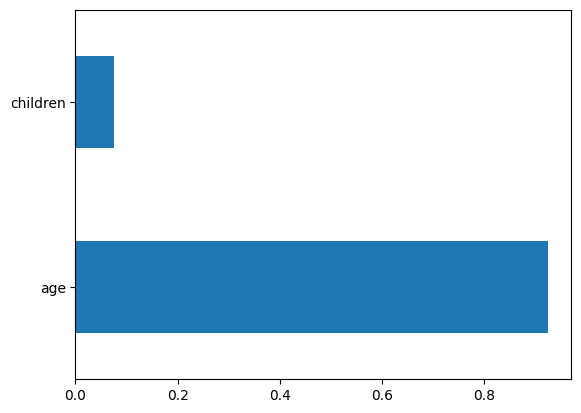

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
    TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting/Visualising the Decision Tree

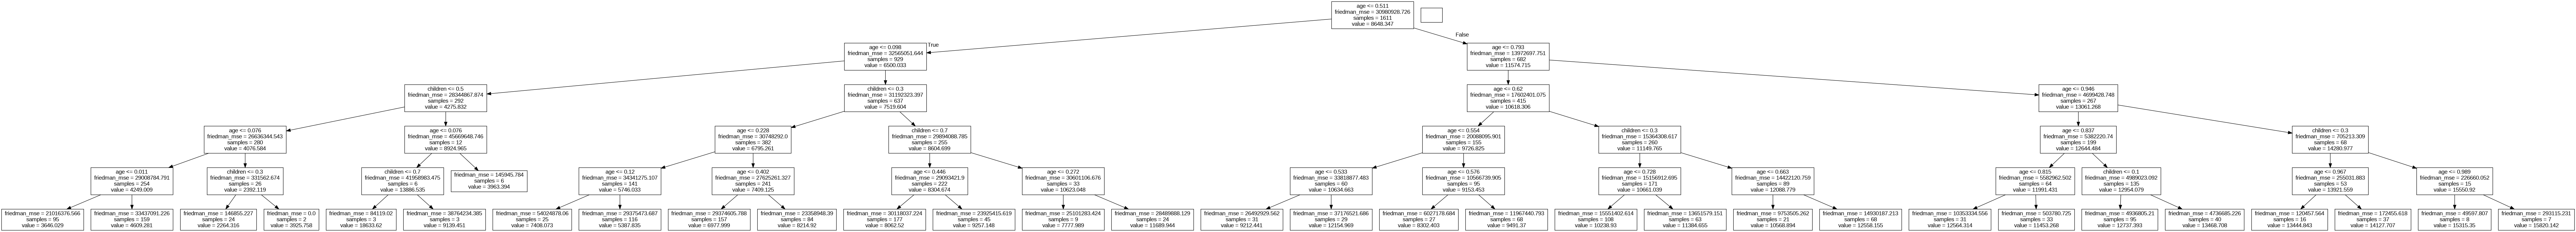

In [ ]:

# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=1600,height=1000)
# Double click on the graph to zoom in

# Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.3201941936529572

##### Model Validation and Accuracy Calculations ##########
        age  children     charges  Predictedcharges
0  0.695652       0.6  11085.5868           11783.0
1  0.086957       0.0   2150.4690            3505.0
2  1.000000       0.0  14394.5579           13951.0
3  0.717391       0.2   9877.6077           10501.0
4  0.782609       0.0  10923.9332           11342.0
Mean Accuracy on test data: 49.86260643596917
Median Accuracy on test data: 58.09323638819906

Accuracy values for 10-fold Cross Validation:
 [45.41752715 49.26628013 45.51610906 51.96569518 47.91747128 45.55012726
 49.30850961 45.36542502 52.11181927 48.07798699]

Final Average Accuracy of the model: 48.05


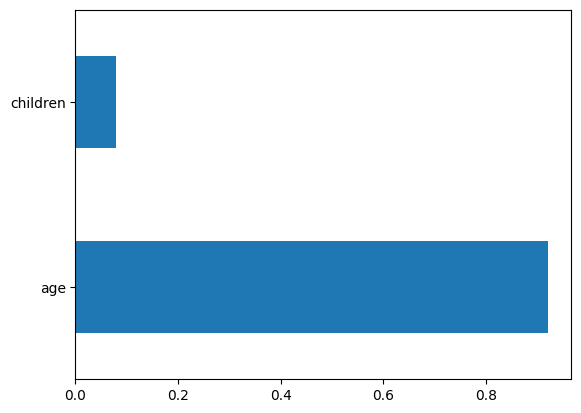

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
    TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting One of the Decision Tree in Random Forest Regressor

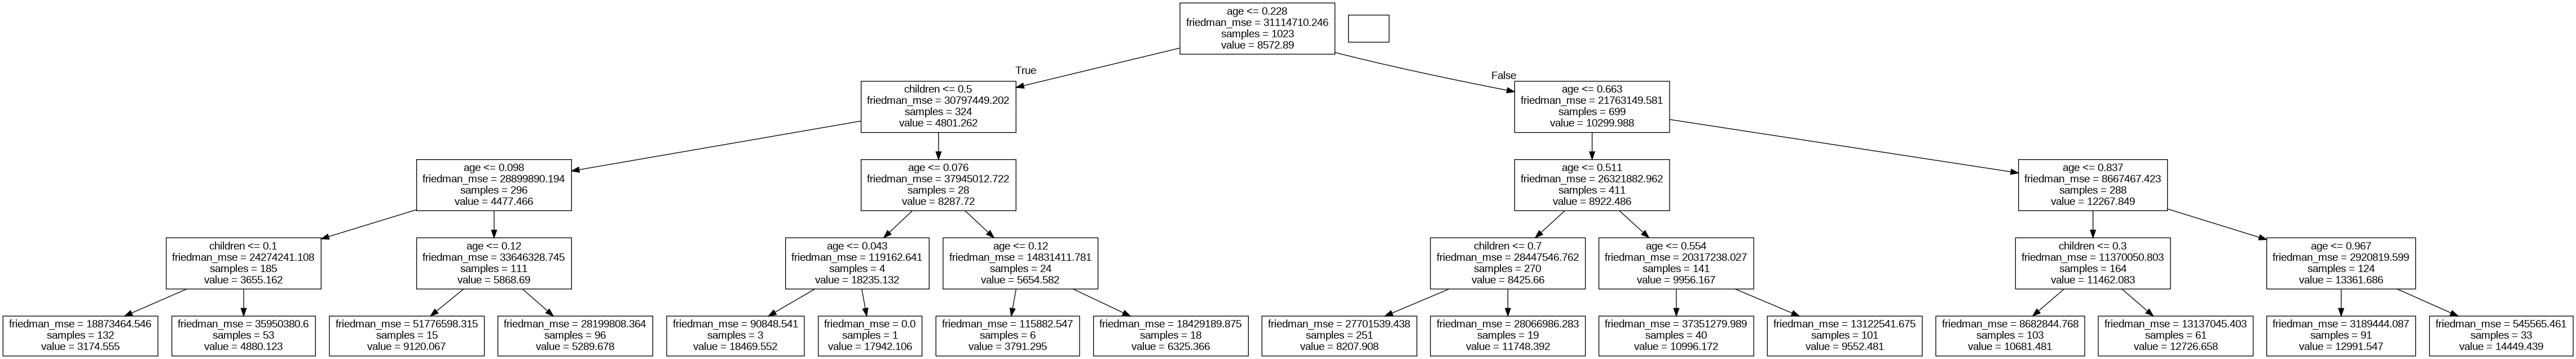

In [ ]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=1600,height=1000)
# Double click on the graph to zoom in


## **Step 23: AdaBoost Algorithm For ML/AI model building**

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.24881692243925646

##### Model Validation and Accuracy Calculations ##########
        age  children     charges  Predictedcharges
0  0.695652       0.6  11085.5868           12438.0
1  0.086957       0.0   2150.4690            5384.0
2  1.000000       0.0  14394.5579           13638.0
3  0.717391       0.2   9877.6077           12146.0
4  0.782609       0.0  10923.9332           12519.0
Mean Accuracy on test data: 25.40111156565075
Median Accuracy on test data: 49.35979796456286

Accuracy values for 10-fold Cross Validation:
 [17.53355616 22.61585612 15.76036323 27.62410355 19.0660198  15.76708107
 22.18400515 14.29338834 27.01769108 19.75213621]

Final Average Accuracy of the model: 20.16


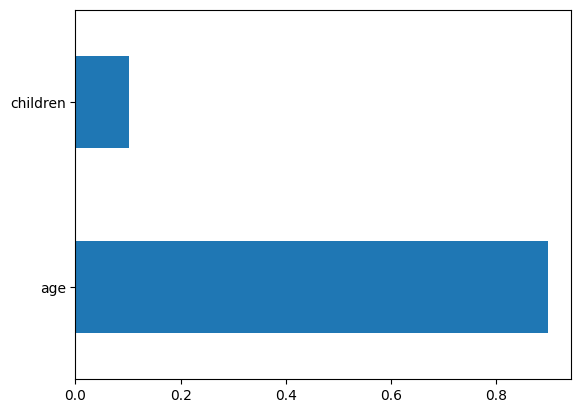

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.35489892488397834

##### Model Validation and Accuracy Calculations ##########
        age  children     charges  Predictedcharges
0  0.695652       0.6  11085.5868           11995.0
1  0.086957       0.0   2150.4690            2047.0
2

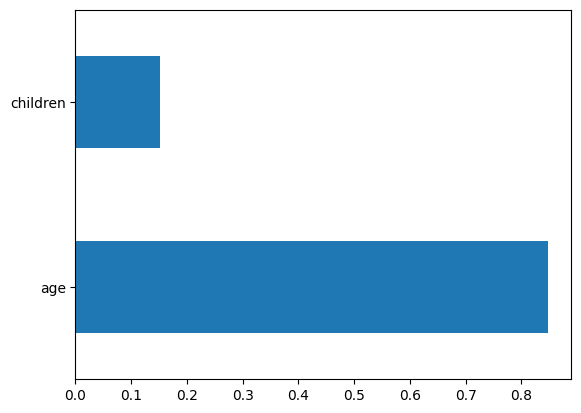

In [ ]:
##XGBoost
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
 TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#Plotting a single Decision tree out of XGBoost

<Axes: >

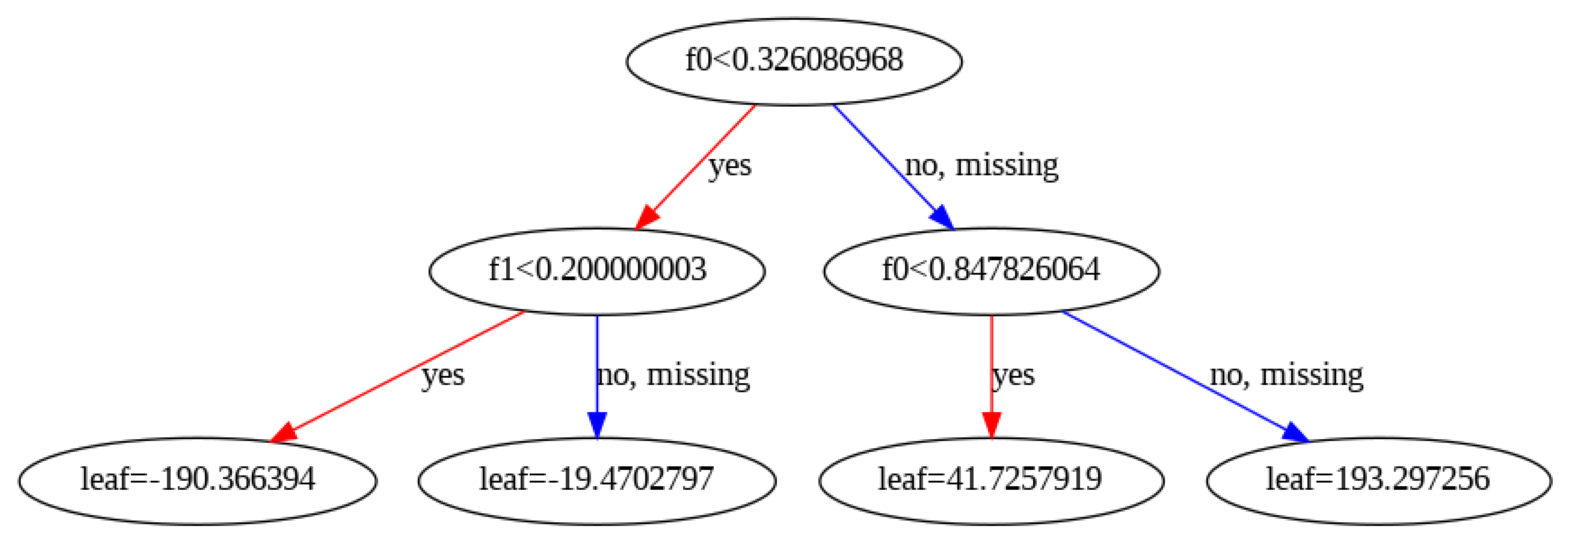

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

# K-Nearest Neighbor(KNN)

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.23904939605863407

##### Model Validation and Accuracy Calculations ##########
        age  children     charges  Predictedcharges
0  0.695652       0.6  11085.5868           16700.0
1  0.086957       0.0   2150.4690            2119.0
2  1.000000       0.0  14394.5579           14209.0
3  0.717391       0.2   9877.6077            9736.0
4  0.782609       0.0  10923.9332           10335.0
Mean Accuracy on test data: 38.69953482392084
Median Accuracy on test data: 91.11958498228414

Accuracy values for 10-fold Cross Validation:
 [32.65906373 27.87133498 29.94995915 56.08125755 40.4005985  41.05984199
 41.1653788  34.65055172 40.58555178 33.86725944]

Final Average Accuracy of the model: 37.83


# Support Vector Machine (SVM) Regressor

In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: -0.010926802664761759

##### Model Validation and Accuracy Calculations ##########
        age  children     charges  Predictedcharges
0  0.695652       0.6  11085.5868            7791.0
1  0.086957       0.0   2150.4690            7573.0
2  1.000000       0.0  14394.5579            7867.0
3  0.717391       0.2   9877.6077            7783.0
4  0.782609       0.0  10923.9332            7797.0
Mean Accuracy on test data: 20.003477419023397
Median Accuracy on test data: 56.62437056717087

Accuracy values for 10-fold Cross Validation:
 [ 9.10969386 14.45540033 10.53863588 23.41652404 15.40711949  8.94838016
 14.48338599 10.29503637 23.27989747 15.60169173]

Final Average Accuracy of the model: 14.55


## **Step 24: Model Deployment**


* Deployment of the Model - Based on the above trials we select that algorithm which produces the best average accuracy.

* In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

* I am choosing XGboost as the final model it has the highest accuracy!

* In order to deploy the model we follow steps outlined next.

* Train/Build the model again using 100% data available

* Save the model as a serialized file which can be stored anywhere.

* Create a python function which gets integrated with front-end Viewer(GUI/ Website etc.) to take all the inputs and returns the prediction

* Choosing only the most important variables

* Its beneficial to keep lesser number of predictors for the model while deploying it in production.

* The lesser predictors you keep, the better it is, because the model will be less dependent on predictor columns/features, hence, more stable.

* This is important specially when the data is high dimensional(too many predictor columns/features).

* For this dataset, the most important predictor variables are **'age', 'children'**. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables will result in better house price prediction platform/system.

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='charges'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['age', 'children']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(2302, 2)
(2302,)


# Cross validating the final model accuracy with less predictors

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=6,
                      learning_rate=0.7,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [50.31695962 52.55103169 47.0681668  62.17920519 48.34483186 50.11474896
 52.40642512 47.02429815 62.17901588 48.49645051]

Final Average Accuracy of the model: 52.07


# **Step 25: Retraining the final model using 100% data**

In [ ]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

# **Step 26: Save the model as a serialized file which can be stored anywhere**

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content/drive/MyDrive/Capstone Project- Medical Insurance Price Prediction


# **Step 27: Create a python function**

In [ ]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['age', 'children']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

# **Step 28: Calling the function for some new data**

In [ ]:
import pandas as pd

# Define the function for prediction
def FunctionPredictResult(InputData):
    # Load necessary libraries and models
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel = pickle.load(fileReadStream)

    # Load the data used for model training
    DataForML = pd.read_pickle('DataForML.pkl')

    # Combine the new input data with the training data
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Ensure that the input data has the same columns as it was used for training
    Predictors = ['age', 'children']

    # Extract the relevant features and generate dummy variables if necessary
    InputData = InputData[Predictors]

    # If there are nominal variables requiring dummy encoding, you can apply pd.get_dummies here

    # Assuming PredictorScalerFit is defined elsewhere and used for standardization
    # X = PredictorScalerFit.transform(InputData)

    # Generate predictions
    Predictions = PredictionModel.predict(InputData)

    # Create a DataFrame to store the predictions
    PredictionResult = pd.DataFrame(Predictions, columns=['Prediction'])

    return PredictionResult

# Define the new sample data
NewSampleData = pd.DataFrame(data=[[21, 0], [28, 3]], columns=['age', 'children'])

# Call the function to predict on the new data
prediction_result = FunctionPredictResult(NewSampleData)

# Print the prediction result
print(prediction_result)


        Prediction
0     14321.889648
1     16971.015625
2     14321.889648
3     16971.015625
4     16971.015625
...            ...
2299  16971.015625
2300  14321.889648
2301  16971.015625
2302  14321.889648
2303  14321.889648

[2304 rows x 1 columns]


# Conclusion
* The Function FunctionPredictResult() can be used to produce the predictions for one or more new cases at a time.
* Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the house price tasks  in the platform /system.

# Deploying a predictive model as an API
* Django and flask are two popular ways to deploy predictive models as a web service
* You can call your predictive models using a URL from any front end like tableau, java or angular js


# Deploying the model with few parameters
# Function for predictions API

In [ ]:
import pandas as pd
import pickle

# Define the function for prediction
def FunctionPredictResult(InputData):
    # Load necessary libraries and models
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel = pickle.load(fileReadStream)

    # Load the data used for model training
    DataForML = pd.read_pickle('DataForML.pkl')

    # Combine the new input data with the training data
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Ensure that the input data has the same columns as it was used for training
    Predictors = ['age', 'children']

    # Extract the relevant features and generate dummy variables if necessary
    InputData = InputData[Predictors]

    # If there are nominal variables requiring dummy encoding, you can apply pd.get_dummies here

    # Assuming PredictorScalerFit is defined elsewhere and used for standardization
    # X = PredictorScalerFit.transform(InputData)

    # Generate predictions
    Predictions = PredictionModel.predict(InputData)

    # Create a DataFrame to store the predictions
    PredictionResult = pd.DataFrame(Predictions, columns=['Prediction'])

    return PredictionResult

# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_age, inp_children):
    # Creating a DataFrame for the model input
    SampleInputData = pd.DataFrame(data=[[inp_age, inp_children]], columns=['age', 'children'])

    # Calling the function defined above using the input parameters
    Predictions = FunctionPredictResult(InputData=SampleInputData)

    # Returning the predictions
    return Predictions.to_json()

# Function call
result = FunctionGeneratePrediction(inp_age=21, inp_children=0)
print(result)


{"Prediction":{"0":14321.8896484375,"1":14321.8896484375,"2":16971.015625,"3":16971.015625,"4":14321.8896484375,"5":14321.8896484375,"6":14321.8896484375,"7":16971.015625,"8":16971.015625,"9":16971.015625,"10":14321.8896484375,"11":14321.8896484375,"12":14321.8896484375,"13":16971.015625,"14":16971.015625,"15":14321.8896484375,"16":14321.8896484375,"17":14321.8896484375,"18":16971.015625,"19":14321.8896484375,"20":16971.015625,"21":16971.015625,"22":14321.8896484375,"23":16971.015625,"24":16971.015625,"25":14321.8896484375,"26":16971.015625,"27":14321.8896484375,"28":14321.8896484375,"29":16971.015625,"30":14321.8896484375,"31":14321.8896484375,"32":16971.015625,"33":16971.015625,"34":16971.015625,"35":16971.015625,"36":14321.8896484375,"37":16971.015625,"38":14321.8896484375,"39":14321.8896484375,"40":14321.8896484375,"41":16971.015625,"42":16971.015625,"43":16971.015625,"44":16971.015625,"45":16971.015625,"46":16971.015625,"47":16971.015625,"48":16971.015625,"49":16971.015625,"50":14

In [ ]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_age , inp_children):

    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_age , inp_children]],
     columns=['age' , 'children'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction( inp_age=21,
                           inp_children=0,
                             )

'{"Prediction":{"0":14321.8896484375,"1":14321.8896484375,"2":16971.015625,"3":16971.015625,"4":14321.8896484375,"5":14321.8896484375,"6":14321.8896484375,"7":16971.015625,"8":16971.015625,"9":16971.015625,"10":14321.8896484375,"11":14321.8896484375,"12":14321.8896484375,"13":16971.015625,"14":16971.015625,"15":14321.8896484375,"16":14321.8896484375,"17":14321.8896484375,"18":16971.015625,"19":14321.8896484375,"20":16971.015625,"21":16971.015625,"22":14321.8896484375,"23":16971.015625,"24":16971.015625,"25":14321.8896484375,"26":16971.015625,"27":14321.8896484375,"28":14321.8896484375,"29":16971.015625,"30":14321.8896484375,"31":14321.8896484375,"32":16971.015625,"33":16971.015625,"34":16971.015625,"35":16971.015625,"36":14321.8896484375,"37":16971.015625,"38":14321.8896484375,"39":14321.8896484375,"40":14321.8896484375,"41":16971.015625,"42":16971.015625,"43":16971.015625,"44":16971.015625,"45":16971.015625,"46":16971.015625,"47":16971.015625,"48":16971.015625,"49":16971.015625,"50":1

# Web Deployment using Flask Library/Package
# Installing the flask library required to create the API


In [ ]:
!pip install flask

# Creating Flask API

In [ ]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [ ]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        age_value = float(request.args.get('age'))
        children_value=float(request.args.get('children'))


        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_age=age_value,
                                                       inp_children=children_value
                                                )

        return (prediction_from_api)

    except Exception as e:
        return('Something is not right!:'+str(e))

# Starting the API engine



In [ ]:
import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:9000
INFO:werkzeug:Press CTRL+C to quit


'''
Sample URL to call the API
Copy and paste below URL in the web browser
http://127.0.0.1:9000/prediction_api?LSTAT=4.9&RM=6.5&PTRATIO=15.3
'''

# Desktop App deployment: Tkinter package
* Will not work on Google Colab.
* Need to use PyCharm to run this code.
* We need to make sure  we include the data file (Medical_insurance.csv)

In [ ]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

class MedicalInsurancePricePredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Medical Insurance Price Predictiomn')
        self.data = pd.read_csv('Medical_insurance.csv')
        self.sliders = []

        self.X = self.data.drop('charges', axis=1).values
        self.y = self.data['charges'].values

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        self.model = XGBRegressor()
        self.model.fit(self.X_train, self.y_train)

        self.create_widgets()

    def create_widgets(self):
        for i, column in enumerate(self.data.columns[:-1]):
            label = tk.Label(self.master, text=column + ': ')
            label.grid(row=i, column=0)
            current_val_label = tk.Label(self.master, text='0.0')
            current_val_label.grid(row=i, column=2)
            slider = ttk.Scale(self.master, from_=self.data[column].min(), to=self.data[column].max(), orient="horizontal",
                               command=lambda val, label=current_val_label: label.config(text=f'{float(val):.2f}'))
            slider.grid(row=i, column=1)
            self.sliders.append((slider, current_val_label))

        predict_button = tk.Button(self.master, text='Predict Insurance Charge', command=self.predict_price)
        predict_button.grid(row=len(self.data.columns[:-1]), columnspan=3)

    def predict_price(self):
        inputs = [float(slider.get()) for slider, _ in self.sliders]
        price = self.model.predict([inputs])
        messagebox.showinfo('Predicted Charges', f'The predicted insurance charges is ${price[0]:.2f}')

if __name__ == '__main__':
    root = tk.Tk()
    app = MedicalInsurancePriceApp(root)
    root.mainloop()


#  **END OF PROGRAMMING PROJECT**